#  Exploratory Data Analysis(EDA)

   In this part of data analysis(EDA), we will use adult data set which is available from this UCI Machine Learning Repository    (http://archive.ics.uci.edu/ml/datasets/Adult). The data is already being transformed and cleaned. However, we need to          perform further cleanings in order to demonstrate the results that we have obtained. 

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importing the adult data
df = pd.read_csv ("adult.csv")

# 1. Adult Data Set

### Description of the data

   Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted to          Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.




### What I got to know about the features in dataset 
<ul>
<li>age: continuous.</li>
<li>workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</li>
<li>fnlwgt: continuous.</li>
<li>education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</li>
<li>education-num: continuous.</li>
<li>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</li>
<li>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.</li>
<li>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.</li>
<li>race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.</li>
<li>sex: Female, Male.</li>
<li>capital-gain: continuous.</li>
<li>capital-loss: continuous.</li>
<li>hours-per-week: continuous.</li>
<li>native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.</li>

# 2. Importing the adult dataset and displaying the head, shape and description of the data.

In [3]:
# shape of dataframe
print(df.shape)

# top 5 rows of dataframe
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# this will show whole Statistics of of adult dataset
df.describe( )

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Displaying a breif overview of all the columns data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# 3. Discover and Handle missing values.


In [6]:
# identifying the missing values and replacing them from ( ' - ' , ' ? ' ) to NAN in new_df
missing_val = ['n/a', '-', '?']
df= pd.read_csv('adult.csv', na_values = missing_val)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
# Identifying missing values in columns
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
# Rows with atleast one missing values
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [9]:
# removing 'fnlwgt' column because we don’t need that
df=df.drop(['fnlwgt'], axis = 1)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
# Remove all the rows which cantain missing values
new_df=df.dropna()
new_df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
# percentage of rows that were removed while handling missing values
(1-(len(new_df.index)/len(df.index)))*100

7.411653904426519

# 4. Univariate Analysis

## 4.1 Finding the outliers in numerical column using Boxplots

### 4.1.1 Boxplot for all numerical column

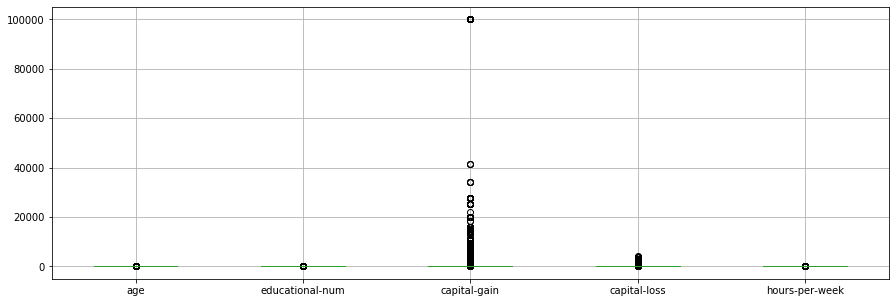

In [12]:
# Finding the outliers in numerical column using Boxplots
new_df.boxplot(figsize=(15,5))

  ### Observation
<ul>
<li> As we can see from the above plots that our adult dataset contain large numbers of outliers in it where the maximum number of outliers are present in the capital-gain column itself</li>

### 4.1.2 Boxplot for each numerical column

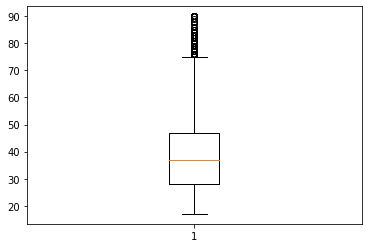

In [13]:
# Boxplot for age column
plt.boxplot(new_df['age'])
plt.show()


### Observation
<ul>
<li> As we can see from the above plots that most of the outlines in the age boxplot are extremely higher (i.e., x>Q3 - 1. 5 * IQR). where Q3 is 75% from the Statistics.</li>

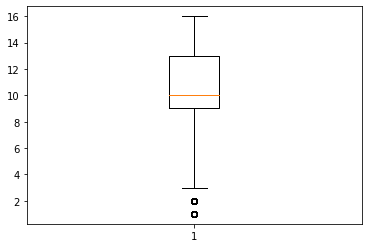

In [14]:
# Boxplot for educational-num column
plt.boxplot(new_df['educational-num'])
plt.show()


### Observation
<ul>
<li> As we can see from the above plots that most of the outlines in the educational-NUM boxplot are extremely low and lies below the 3.</li>

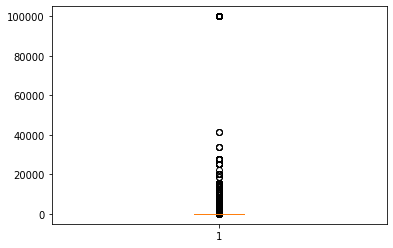

In [15]:
# Boxplot for capital-gain column
plt.boxplot(new_df['capital-gain'])
plt.show()


### Observation
<ul>
<li> As we can see from the above plots that most of the outlines in the capital-gain boxplot are extremely high and reach up to 100000.</li>

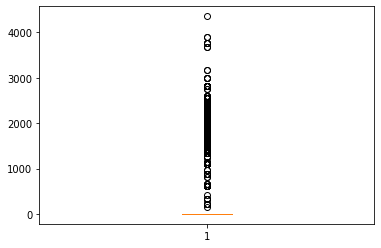

In [16]:
# Boxplot for capital-loss column
plt.boxplot(new_df['capital-loss'])
plt.show()


### Observation
<ul>
<li> As we can see from the above plots that most of the outlines in the capital-loss boxplot are extremely high and reach up to 4000.</li> 

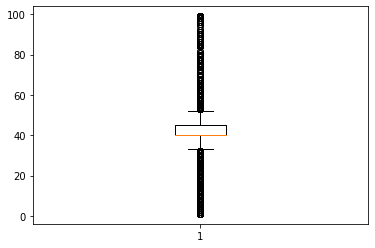

In [17]:
# Boxplot for hours-per-week column
plt.boxplot(new_df['hours-per-week'])
plt.show()


  ### Observation
<ul>
<li> As we can see from the above plots that most of the outlines in the hours-per-week boxplot are extremely high and extremely lower at the same time.</li> 

## 4.2 Probability distribution of each numerical column using distplot


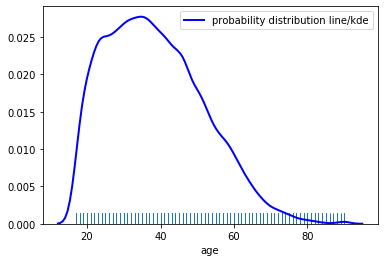

In [18]:
# Kde/Probability distribution for age column
sns.distplot(new_df['age'],hist=False,rug=True,kde_kws={"color": "b", "lw": 2, "label": "probability distribution line/kde"})

### Observation
<ul>
<li> Kde are basically used to find the probability distribution in the dataset.</li>
<li> In the age probability distribution plot we can see the higher probability distribution is in between 15-45 age group which make sense because most of the population is younger in age compared to the others.</li>

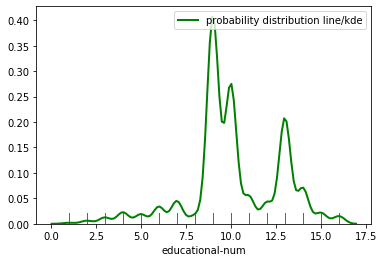

In [19]:
# Kde/Probability distribution for educational-num column
sns.distplot(new_df['educational-num'],hist=False,rug=True,kde_kws={"color": "g", "lw": 2, "label": "probability distribution line/kde"})

### Observation
<li> In the educational-num probability distribution plot we can see two spikes where the first one is in between 8-11 and another one is in between 12.5-13.5 where the first one represents the number of years that it takes to complete school for the average person and the second one for the university.</li>

## NOTE :- Kde/Probability distribution for capital-gain and capital-loss column 
### Reason/Observation
<li>Kde/Probability distribution for capital-gain and capital-loss column can't be drowned because Selected KDE bandwidth is 0 and it Cannot estimate density.</li>


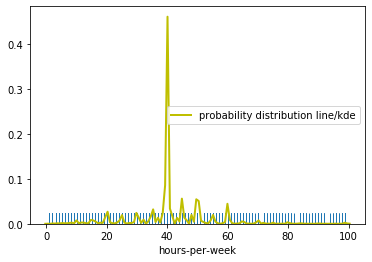

In [20]:
# Kde/Probability distribution for hours-per-week column
sns.distplot(new_df['hours-per-week'],hist=False,rug=True,kde_kws={"color": "y", "lw": 2, "label": "probability distribution line/kde"})

### Observation
<li> The houes_per_weak has larger spike where the value is 40 which probably make sense because most of the people work 30-40 hours per week.</li>

## 4.3 Frequency distribution of each numerical column using Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAD575D348>,
      dtype=object)

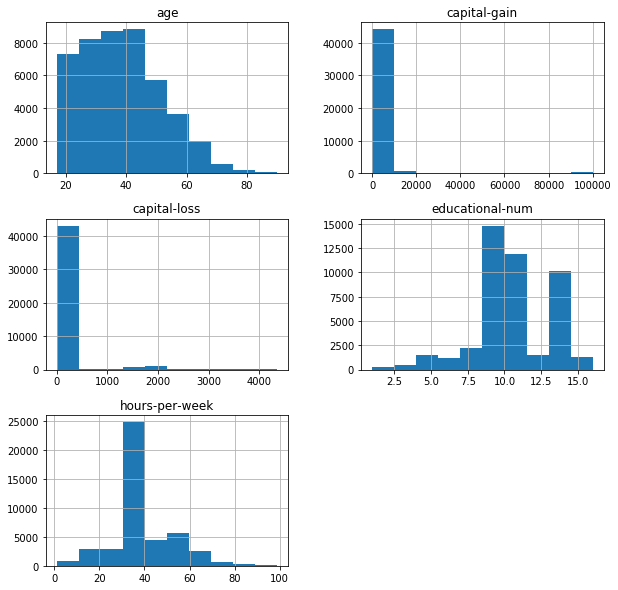

In [21]:
# Histogram plot for frequency distribution of each numerical column
new_df.hist(figsize=(10,10))

### Observation
<ul>
<li> Histograms are basically used to find the frequency distribution in the dataset.</li>
<li> In the age histogram plot we can see the higher frequency distribution is in between 15-45 age group which make sense because most of the population is younger in age compared to the others.</li>
<li> In the capital-gain and capital-loss histogram plot the higher frequency distribution starts from 0 which means the most of the population are not in the sales field which means they didn't sale any commodity which makes capital-gain and capital-loss start from 0.</li> 
<li> In the educational-num histogram plot we can see two spikes where the first one is in between 8-11 and another one is in between 13-14 where the first one represents the number of years that it takes to complete school for the average person and the second one for the university.</li>  
<li> The houes_per_weak has larger spike where the value is in between 30-40 which probably make sense because most of the people work 30-40 hours per week.</li>
    

## 4.4 Frequency distribution of each categorical Variable/Column

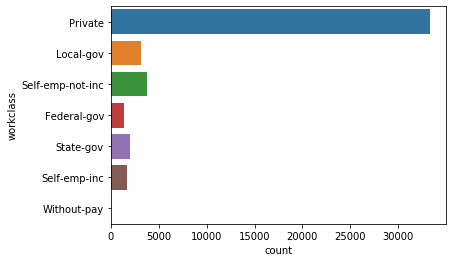

In [22]:
# Frequency distribution for workclass Column
sns.countplot(y="workclass", data=new_df)

### Observation
<li>As we can see from the above plot that most of the population works under the private sector companies.</li>
<li>Over more than thirty thousand people are working under private sector companies.</li>

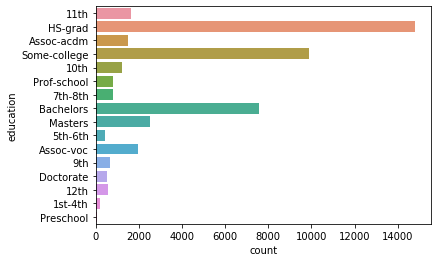

In [23]:
# Frequency distribution for education Column
sns.countplot(y="education", data=new_df)

### Observation
<li>As we can see from the above plot that there are three major spikes where the most longest spike of the population are pursuing a High School Graduate and the other two are pursuing some-college and bachelors.</li>
<li>More than fourteen thousand people are pursuing Hs-grad.</li>
<li>Over ten thousand people are pursuing some-college</li>
<li>More than seven thousand people are pursuing bachelors.</li>

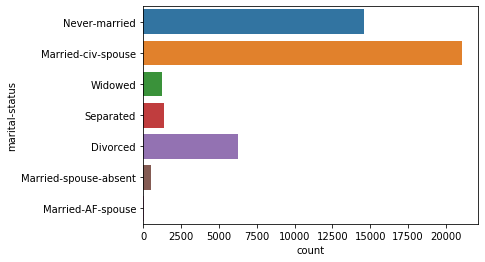

In [24]:
# Frequency distribution for marital-status Column
sns.countplot(y="marital-status", data=new_df)

### Observation
<li>As we can see from the above plot that there are two major spikes where the larger one shows that the most of the population are married-civ-spouse and the other spike shows that after married-civ-spouse the most of the population get never-married.</li>
<li>Over more then twenty thousand people are married-Civ-spouse.</li>
<li>More than fourteen thousand people are in the category of never married.</li>

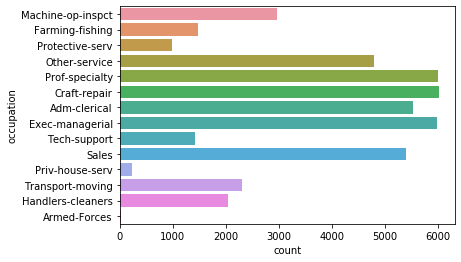

In [25]:
# Frequency distribution for occupation Column
sns.countplot(y="occupation", data=new_df)

### Observation
<li>As we can see from the above plot that top three spikes, i.e. Prof-specialty, craft-repair, exec-managerial are reaching up to six thousand.</li>

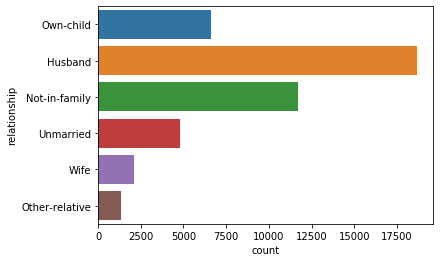

In [26]:
# Frequency distribution for relationship Column
sns.countplot(y="relationship", data=new_df)

### Observation
<li>As we can see from the above plot that most of the population are under the category of husband.</li>
<li>We can also see that husband category reaches up to seventeen thousand five hundred.</li>

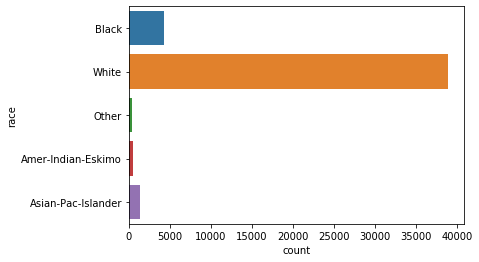

In [27]:
# Frequency distribution for race Column
sns.countplot(y="race", data=new_df)

### Observation
<li>As we can see from the above plot that the highest number of the population are under the category of whites.</li>
<li>We can also see that white category reaches up to thirty thousand.</li> 

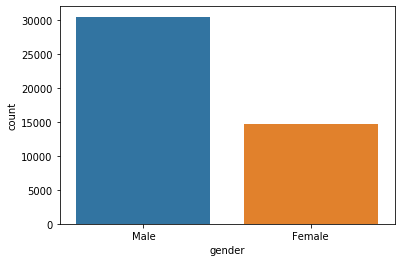

In [28]:
# Frequency distribution for gender Column
sns.countplot(x="gender", data=new_df)

### Observation
<li>As we can see from the above plot that the population of males are twice as much as females.</li>
<li>We can also see that the count of males reaches up to thirty thousand.</li>  

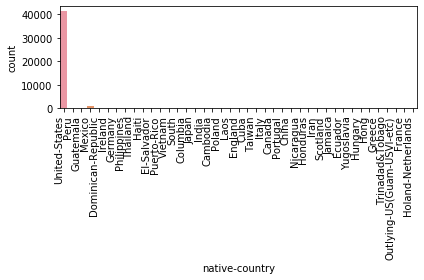

In [29]:
# Frequency distribution for native-country Column
ax=sns.countplot(x="native-country", data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

### Observation
<li>As we can see from the above plot that the count of united-states is very-very high in comparison to the other native-countries.</li>
   

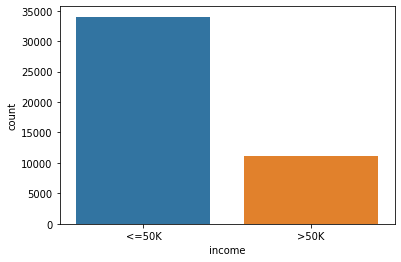

In [30]:
# Frequency distribution for income Column
sns.countplot(x="income", data=new_df)

### Observation
<li>As we can see from the above plot that the count of >50k is approximately 23000 less in comparison to other.</li>

# 5. Bivariate Analysis


## 5.1.1 Relationships between numerical columns using pair plots

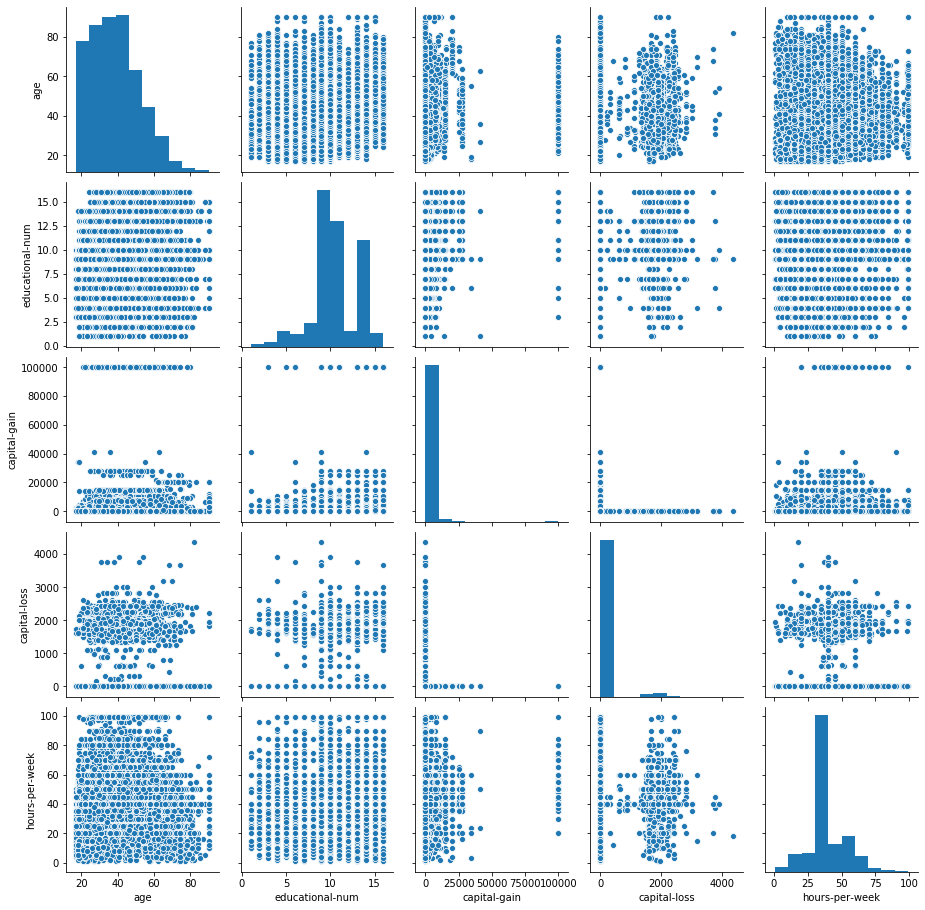

In [31]:
# relationships between all numerical columns using pair plots
sns.pairplot(new_df)

### Observation
<li>As we can see from the above pair plot that we have five histograms diagonally for five different numerical columns with themselves.</li> 
<li>We can also see that we also get Scatter plots which are showing the relationships between five different numerical columns using pair plots.</li> 
<li>As the above plot is very exhausted and messy, so we are going to find relationships between different numerical columns using hexbin plots by using the combinations of different numerical columns which we already have from the pair plot.</li>

## 5.1.2 Relationships between numerical columns using  hexbin plots

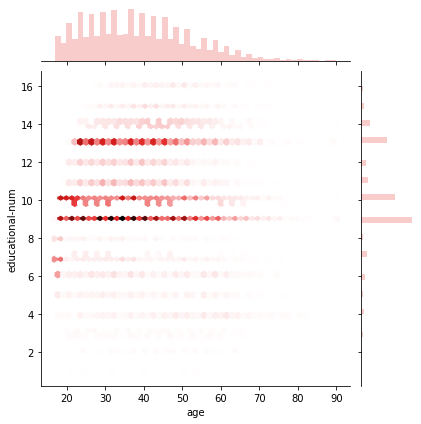

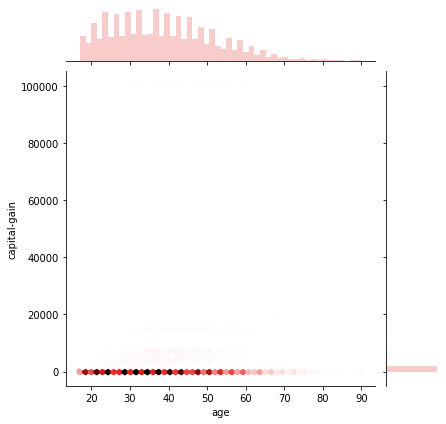

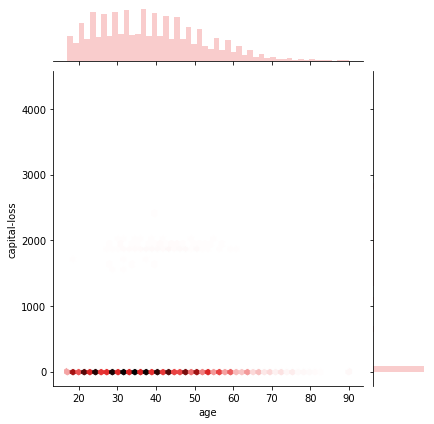

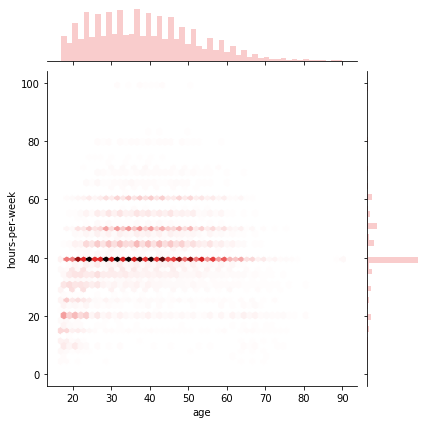

In [32]:
# Relationships between age and other numerical columns using hexbin plots
sns.jointplot(x='age',y='educational-num',data=new_df,kind='hex',color='lightcoral')

sns.jointplot(x='age',y='capital-gain',data=new_df,kind='hex',color='lightcoral')

sns.jointplot(x='age',y='capital-loss',data=new_df,kind='hex',color='lightcoral')

sns.jointplot(x='age',y='hours-per-week',data=new_df,kind='hex',color='lightcoral')

### Observation
<li>As we can see from the above hexbin plot between age and other numerical columns we can conclude these.</li>

1. We can say that as the age increase, the proportion of education level also increases.

2. Capital-gain and capital-loss is constant throughout the age because most of the population are not in the sales occupation.

3. We can tell from the above graph that hours-per-week for the age group of 15-60 are constant.


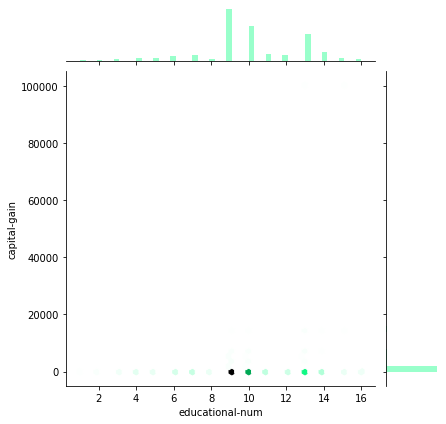

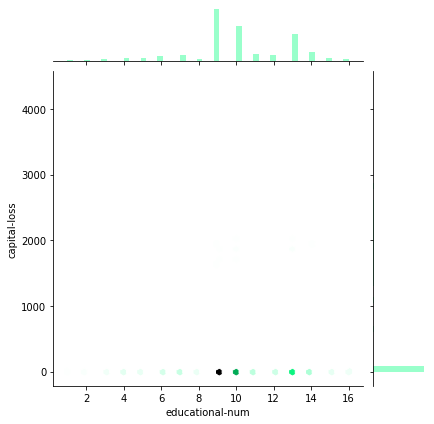

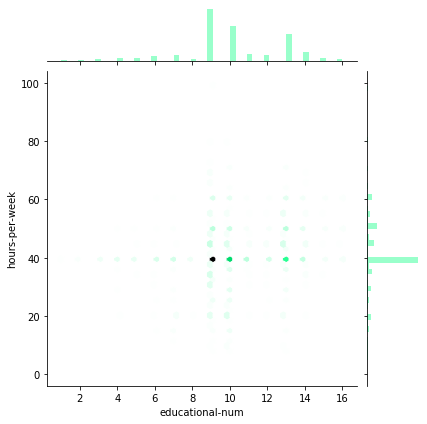

In [33]:
# Relationships between educational-num and other remaining numerical columns using hexbin plots
sns.jointplot(x='educational-num',y='capital-gain',data=new_df,kind='hex',color='springgreen')

sns.jointplot(x='educational-num',y='capital-loss',data=new_df,kind='hex',color='springgreen')

sns.jointplot(x='educational-num',y='hours-per-week',data=new_df,kind='hex',color='springgreen')

### Observation

<li>As we can see from the above hexbin plot between educational-num and other remaining numerical columns we can conclude these.</li>

1. As we can see from the education-name that at the education level of 9th,10th and graduation/13th the capital-gain and capital-loss is higher in comparison to the others.

2. We can say that those people who are pursuing 9th,10th and graduation/13th are working more hours-per-week than others.
 

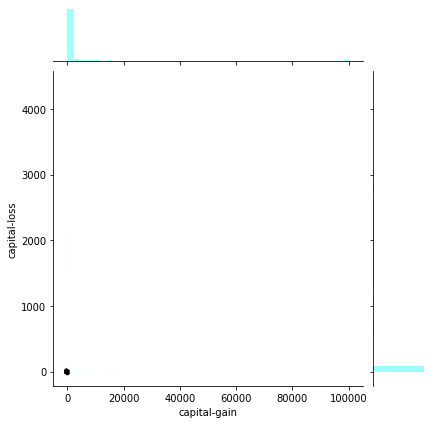

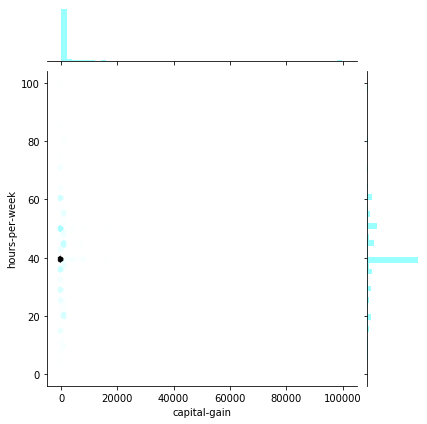

In [34]:
# Relationships between capital-gain and other remaining numerical columns using hexbin plots
sns.jointplot(x='capital-gain',y='capital-loss',data=new_df,kind='hex',color='aqua')

sns.jointplot(x='capital-gain',y='hours-per-week',data=new_df,kind='hex',color='aqua')


### Observation

<li>As we can see from the above hexbin plot between capital-gain and other remaining numerical columns we can conclude these.</li>
1. As we can see from the above plot that there is no relation between capital-gain and capital-loss, hours-per-week.



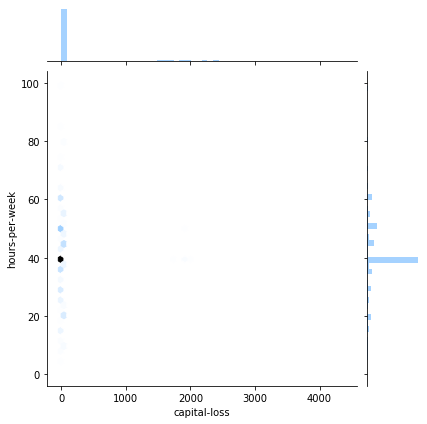

In [35]:
# Relationships between capital-loss and other numerical columns using hexbin plots
sns.jointplot(x='capital-loss',y='hours-per-week',data=new_df,kind='hex',color='dodgerblue')


### Observation

<li>As we can see from the above hexbin plot between capital-loss and hours-per-week columns we can conclude that there is no relatio between capital-loss and hours-per-week.</li> 

# 5.2 Identify the patterns between categorical and numerical columns 

## 5.2.1  Using catplot

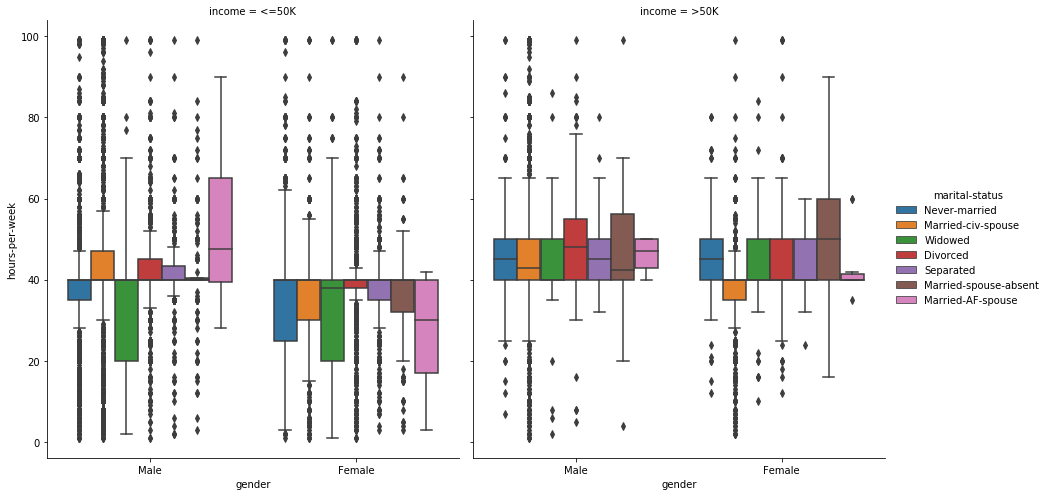

In [36]:
# Identify the patterns between categorical and numerical columns using catplot
sns.catplot(x="gender", y="hours-per-week",
                hue="marital-status", col="income",
                data=df, kind="box",height=7, aspect=.9)


### Observation
<li>As we can see from the above plot that married-AF-spouse males are working more hours a week than other people and earning same as much as other people of the same category of less than equal to fifty thousand.</li>
<li>We can also see that females are earning as much as married-AF-spouse males, by working less hours a week.</li> 
<li>In the category of >50k income we can see that both male and female of married-spouse-absent category are working more than other peoples in which females are working more as compared to the males.</li>

## 5.2.1  Using boxplot and barplot one below another

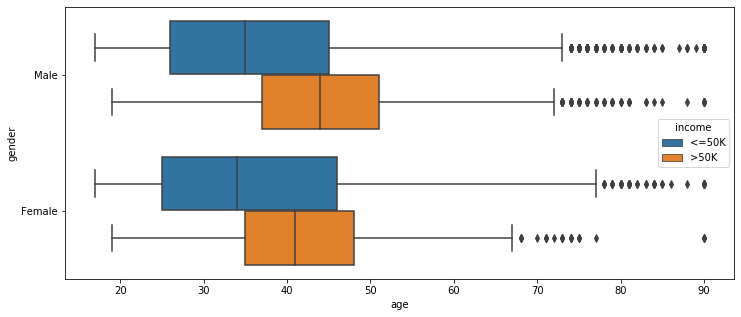

In [37]:
# Fig.1.1
# boxplot between age,gender and income
g=sns.boxplot(data=new_df,x='age',y='gender',hue='income')
g.figure.set_size_inches(12,5)

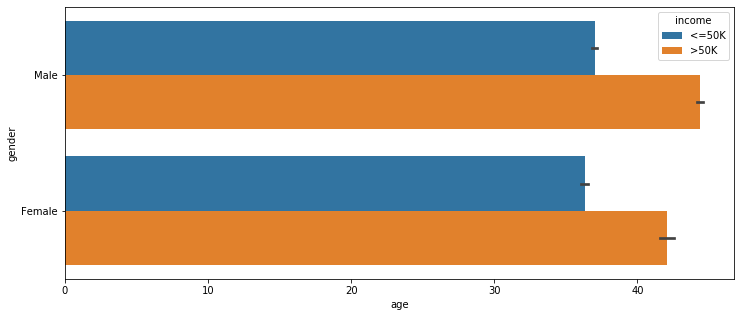

In [38]:
# Fig.1.2
# barplot between age,gender and income
g=sns.barplot(data=new_df,x="age", y="gender", hue="income")
g.figure.set_size_inches(12,5)
plt.show()

### Observation:- (for fig. 1.1 and 1.2)
<li>As we can see from the above boxplot that females starting earning slightly before male starting earning.</li>
<li>We can also see that females are earning as much as males are earning in the approx same age group.</li>

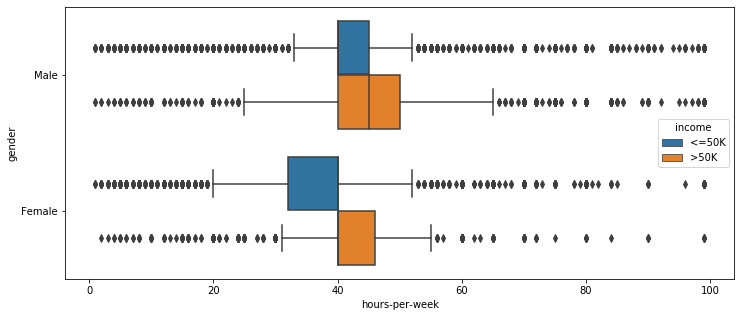

In [39]:
# Fig.2.1
# boxplot between hours-per-week,gender and income
g=sns.boxplot(data=new_df,x='hours-per-week',y='gender',hue='income')
g.figure.set_size_inches(12,5)
plt.show()

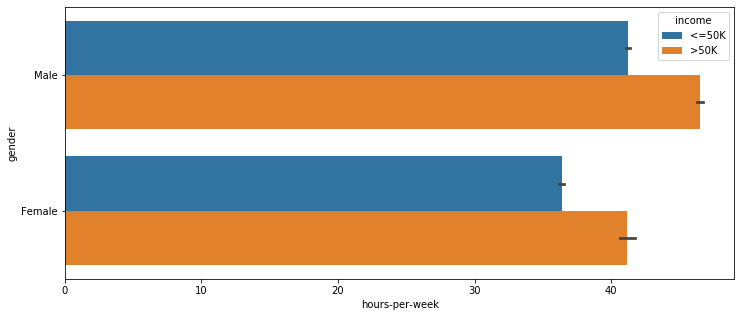

In [40]:
# Fig.2.2
# barplot between hours-per-week,gender and income
g=sns.barplot(data=new_df,x='hours-per-week',y='gender',hue='income')
g.figure.set_size_inches(12,5)
plt.show()

### Observation:- (for fig. 2.1 and 2.2)
<li>As we can see from the above plot that females average hours-per-week for the same income category is less in comparison to the males.</li>


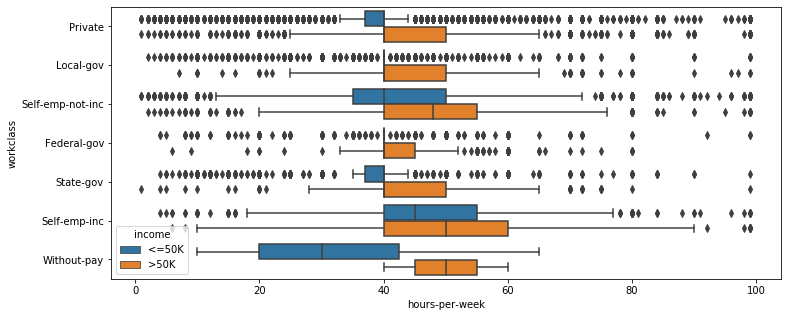

In [41]:
# Fig.3.1
# boxplot between hours-per-week,workclass and income
g=sns.boxplot(data=new_df,x='hours-per-week',y='workclass',hue='income')
g.figure.set_size_inches(12,5)
plt.show()

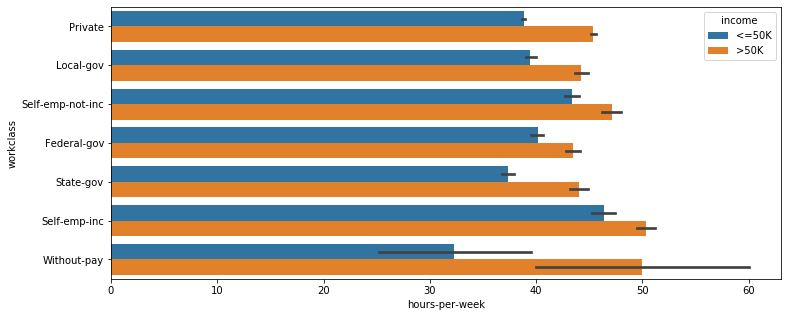

In [42]:
# Fig.3.2
# barplot between hours-per-week,workclass and income
g=sns.barplot(data=new_df,x='hours-per-week',y='workclass',hue='income')
g.figure.set_size_inches(12,5)
plt.show()

### Observation:- (for fig. 3.1 and 3.2)
<li>As we can see from the above plot that on an average people who are earning less then equal to fifty thousand are working less hours-per-week in comparison to the people who are earning more the fifty thousand.</li>
<li>We can also see that the people who are self employed/self-emp-inc are earning more in comparison to the other workloads.</li>


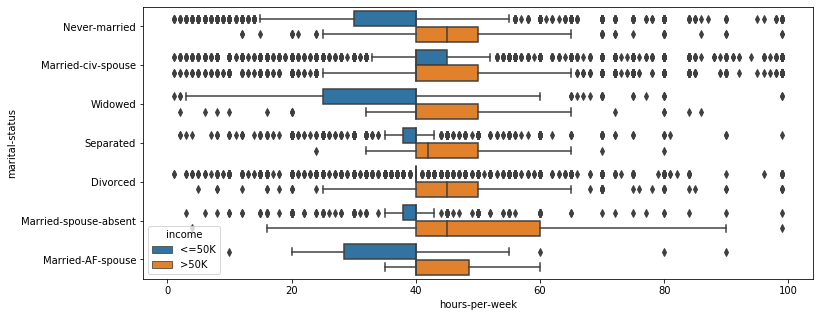

In [43]:
# Fig.4.1
# boxplot between hours-per-week,marital-status and income
g=sns.boxplot(data=new_df,x='hours-per-week',y='marital-status',hue='income')
g.figure.set_size_inches(12,5)
plt.show()

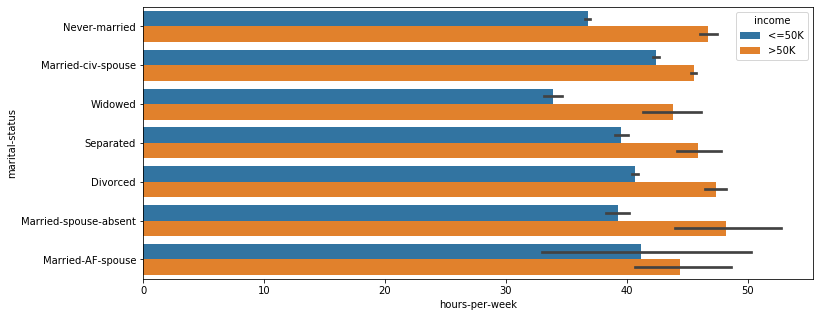

In [44]:
# Fig.4.2
# barplot between hours-per-week,marital-status and income
g=sns.barplot(data=new_df,x='hours-per-week',y='marital-status',hue='income')
g.figure.set_size_inches(12,5)
plt.show()

### Observation:- (for fig. 4.1 and 4.2)
<li>As we can see from the above plot that on an average people who are earning less then equal to fifty thousand are working less hours-per-week in comparison to the people who are earning more the fifty thousand.</li>
<li>We can also see that the people who are married/married-spouse-absent are working more hours-per-week in comparison to the other peoples.</li>

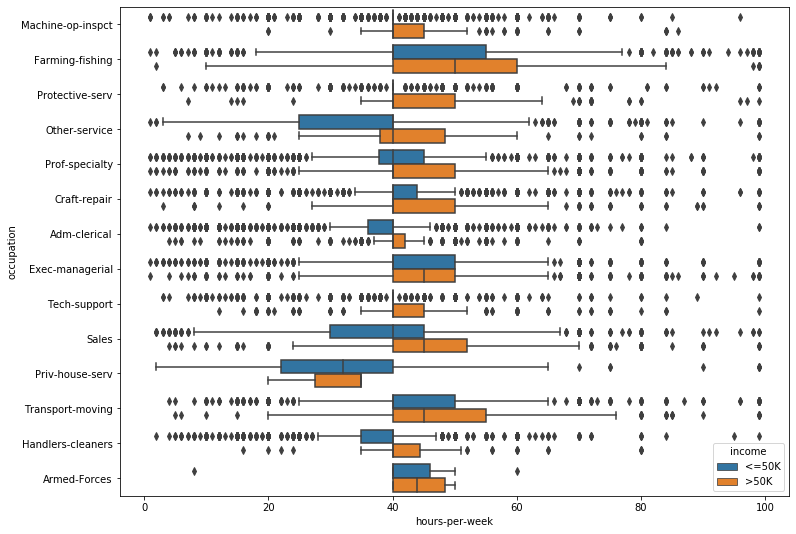

In [45]:
# Fig.5.1
# boxplot between hours-per-week,occupation and income
g=sns.boxplot(data=new_df,x='hours-per-week',y='occupation',hue='income')
g.figure.set_size_inches(12,9)
plt.show()

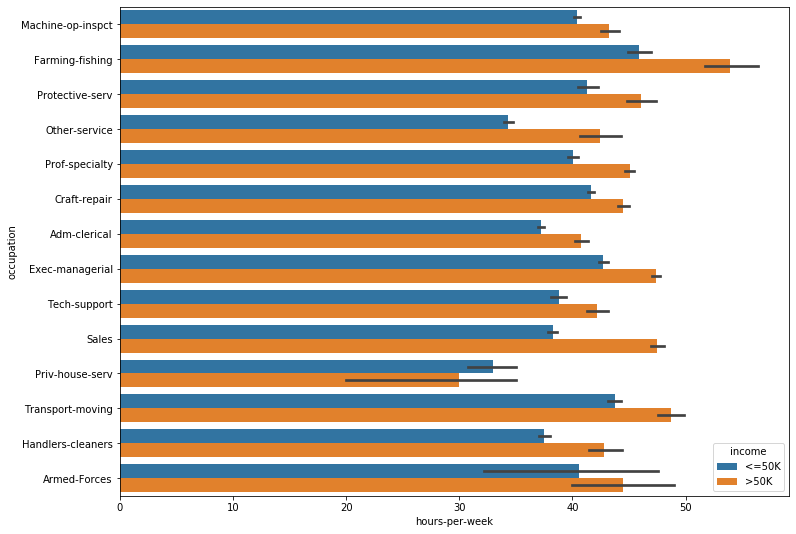

In [46]:
# Fig.5.2
# barplot between hours-per-week,occupation and income
g=sns.barplot(data=new_df,x='hours-per-week',y='occupation',hue='income')
g.figure.set_size_inches(12,9)
plt.show()

### Observation:- (for fig. 5.1 and 5.2)
<li>As we can see from the above plot that farming-fishing occupation is earning more in comparison to the other occupation in both income categories.</li>
<li>We can also see that people who are under farming-fishing occupation is also working more hours-per-week in comparison to other occupation.</li> 

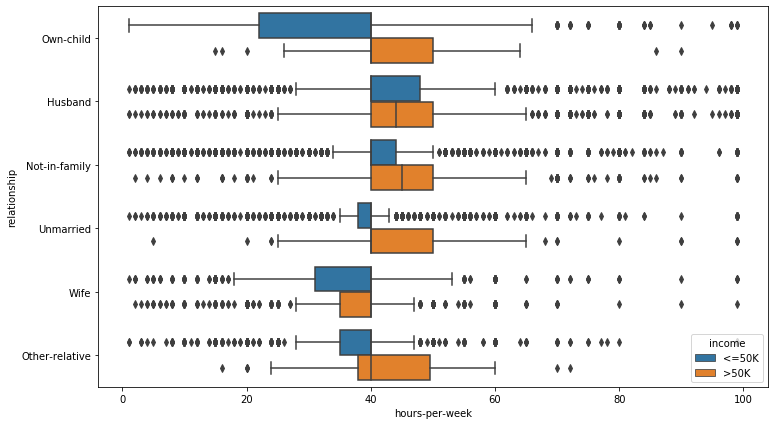

In [47]:
# Fig.6.1
# boxplot between hours-per-week,relationship and income
g=sns.boxplot(data=new_df,x='hours-per-week',y='relationship',hue='income')
g.figure.set_size_inches(12,7)
plt.show()

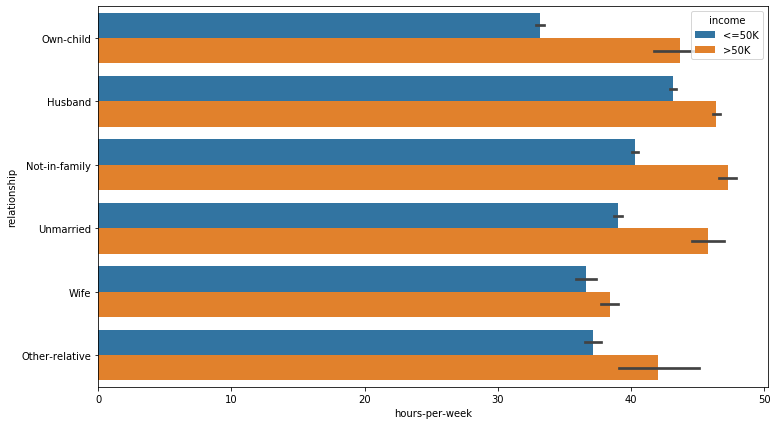

In [48]:
# Fig.6.2
# barplot between hours-per-week,relationship and income
g=sns.barplot(data=new_df,x='hours-per-week',y='relationship',hue='income')
g.figure.set_size_inches(12,7)
plt.show()

### Observation:- (for fig. 6.1 and 6.2)
<li>As we can see from the above plot that those peoples who are earning more than fifty thousand are working more hours-per-week in comparison to others.</li>
<li>We can also see that people who are having a child or those peoples who are under relationship catogery of own-child is working way less than other peoples in the income category of less than equal to 50k.</li> 

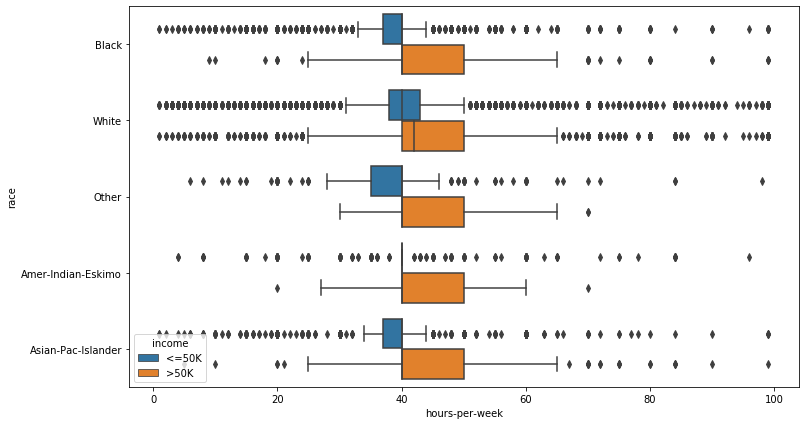

In [49]:
# Fig.7.1
# boxplot between hours-per-week,race and income
g=sns.boxplot(data=new_df,x='hours-per-week',y='race',hue='income')
g.figure.set_size_inches(12,7)
plt.show()

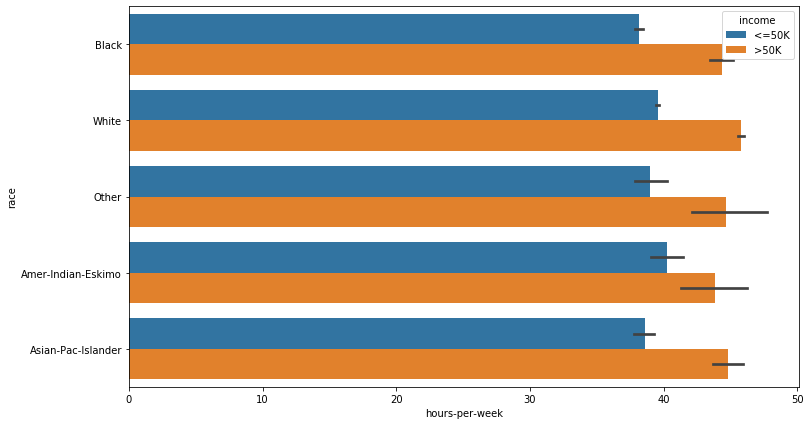

In [50]:
# Fig.7.2
# barplot between hours-per-week,race and income
g=sns.barplot(data=new_df,x='hours-per-week',y='race',hue='income')
g.figure.set_size_inches(12,7)
plt.show()

### Observation:- (for fig. 7.1 and 7.2)
<li>As we can see from the above plot that those peoples who are earning >50k are working approximately for the same hours.</li>
<li>We can also see that those peoples who are earning more than fifty thousand are working more hours-per-week in comparison to others.</li> 

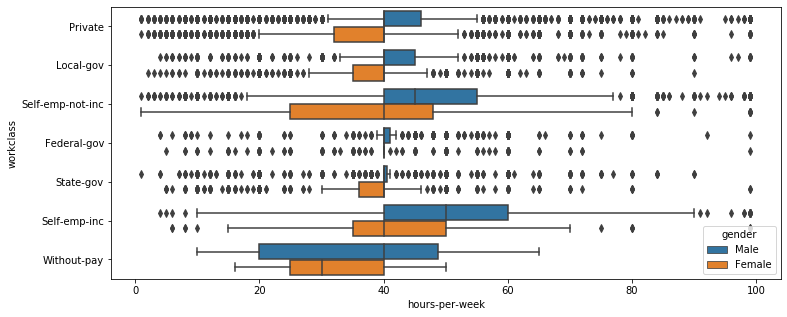

In [51]:
# Fig.8.1
# boxplot between hours-per-week,workclass and gender
g=sns.boxplot(data=new_df,x='hours-per-week',y='workclass',hue='gender')
g.figure.set_size_inches(12,5)
plt.show()

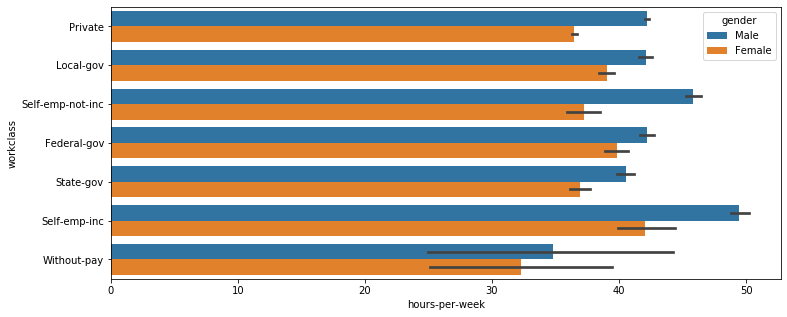

In [52]:
# Fig.8.2
# barplot between hours-per-week,workclass and gender
g=sns.barplot(data=new_df,x='hours-per-week',y='workclass',hue='gender')
g.figure.set_size_inches(12,5)
plt.show()

### Observation:- (for fig. 8.1 and 8.2)
<li>As we can see from the above plot that males are working more hours-per-week in comparison to the females.</li>
<li>We can also see that males in the category of self-emp-inc and self-emp-not-Inc are working more in comparison to other workclass.</li> 

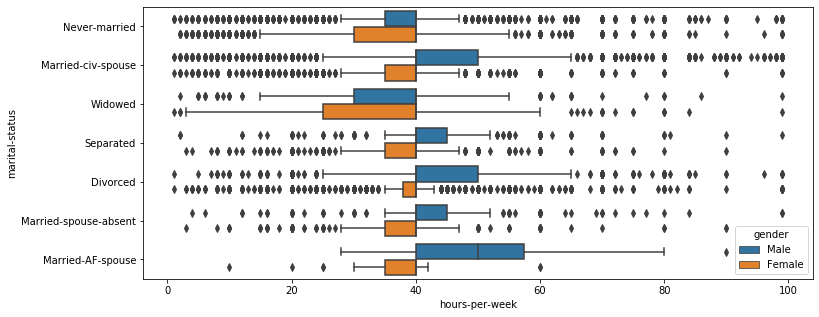

In [53]:
# Fig.9.1
# boxplot between hours-per-week,marital-status and gender
g=sns.boxplot(data=new_df,x='hours-per-week',y='marital-status',hue='gender')
g.figure.set_size_inches(12,5)
plt.show()

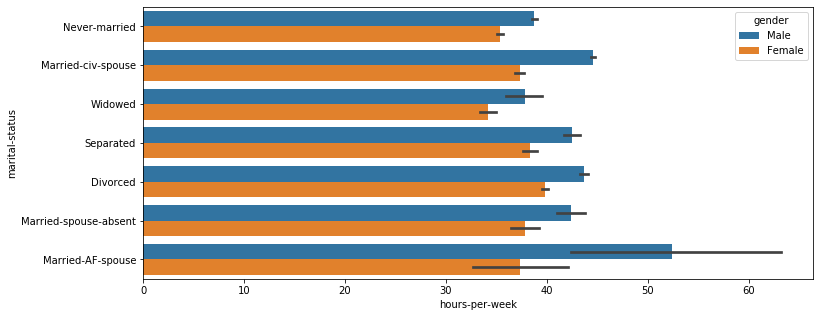

In [54]:
# Fig.9.2
# barplot between hours-per-week,marital-status and gender
g=sns.barplot(data=new_df,x='hours-per-week',y='marital-status',hue='gender')
g.figure.set_size_inches(12,5)
plt.show()

### Observation:- (for fig. 9.1 and 9.2)
<li>As we can see from the above plot that males are working more hours-per-week in comparison to the females.</li>
<li>We can also see that males in category of married-AF-spouse are working more in comparison to other males in the other marital-status category.</li>

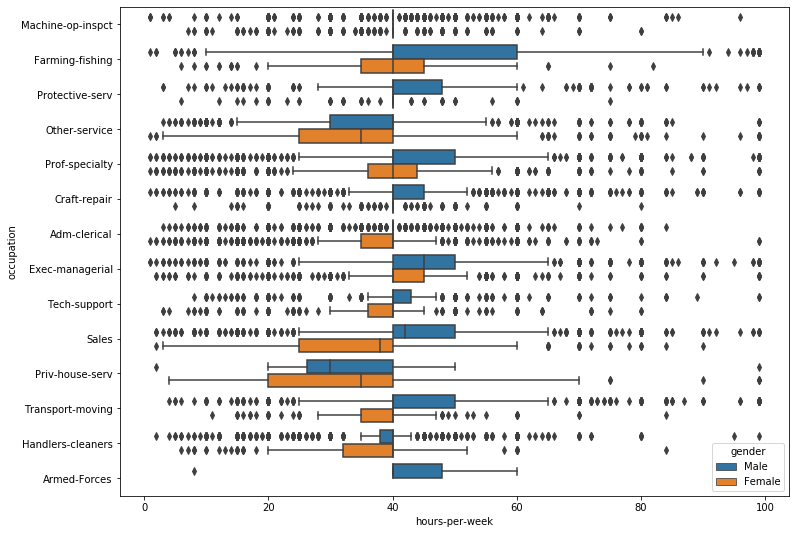

In [55]:
# Fig.10.1
# boxplot between hours-per-week,occupation and gender
g=sns.boxplot(data=new_df,x='hours-per-week',y='occupation',hue='gender')
g.figure.set_size_inches(12,9)
plt.show()

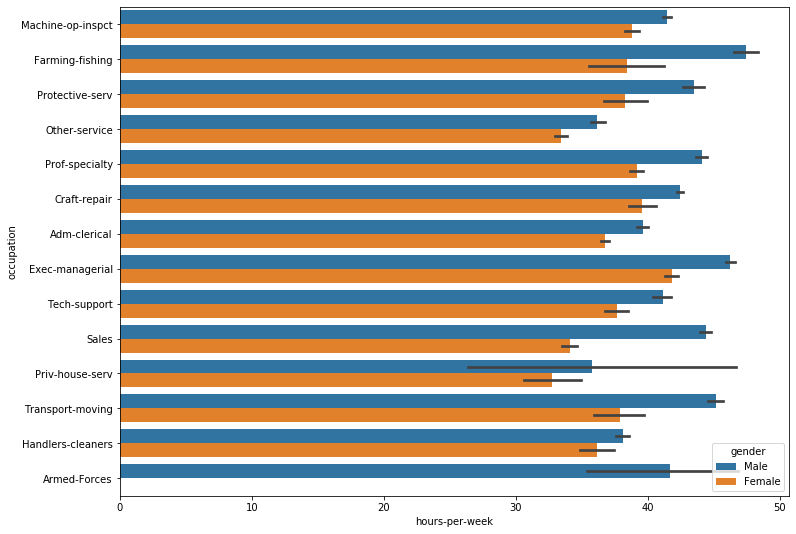

In [56]:
# Fig.10.2
# barplot between hours-per-week,occupation and gender
g=sns.barplot(data=new_df,x='hours-per-week',y='occupation',hue='gender')
g.figure.set_size_inches(12,9)
plt.show()

### Observation:- (for fig. 10.1 and 10.2)
<li>As we can see from the above plot that males are working more hours-per-week in comparison to the females.</li>
<li>We can also see that males in all occupations are working for almost equal time in hours-per-week.</li>

# 6. Conclusion :-
<ul>
<li>From the plot(5.2.1) we can canclude these:-</li>
    
1. As we can see from the above plot that married-AF-spouse males are working more hours a week than other people and earning same as much as other people of the same category of less than equal to fifty thousand. 
    
2. We can also see that females are earning as much as married-AF-spouse males, by working less hours a week.
    
3. In the category of >50k income we can see that both male and female of married-spouse-absent category are working more than other peoples in which females are working more as compared to the males.

# 7. Perform feature transformation:

In [57]:
dumm_df = new_df[['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']]
dumm_df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [58]:
dumm_df = pd.get_dummies(dumm_df)
dumm_df.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [59]:
new_df = new_df.drop(['workclass','education','marital-status','occupation','relationship','race','gender','native-country'],axis=1).join(dumm_df)
new_df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,7,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38,9,0,0,50,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28,12,0,0,40,>50K,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,10,7688,0,40,>50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,34,6,0,0,30,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [60]:
new_df=new_df.drop(['income'], axis = 1)
new_df

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
5,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
48838,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
48839,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
48840,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [61]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale

In [63]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(new_df)
data_norm= pd.DataFrame(np_scaled, columns = new_df.columns)
data_norm.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0.109589,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.287671,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.150685,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.369863,0.600000,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.232877,0.333333,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
